In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sc
import statsmodels.api as sm

In [2]:
df = pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
1,2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
2,2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
3,2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700
4,2014-06-03,89.779999,91.248573,89.750000,91.077141,82.489952,73177300


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1506,2020-05-20,316.679993,319.519989,316.519989,319.230011,319.230011,27876200
1507,2020-05-21,318.660004,320.890015,315.869995,316.850006,316.850006,25672200
1508,2020-05-22,315.769989,319.230011,315.350006,318.890015,318.890015,20450800
1509,2020-05-26,323.500000,324.239990,316.500000,316.730011,316.730011,31380500
1510,2020-05-27,316.140015,318.709991,313.089996,318.109985,318.109985,28211100


In [5]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df[['Open','High','Low']].corr()

,Open,High,Low
Open,1.000000,0.999564,0.999542
High,0.999564,1.000000,0.999255
Low,0.999542,0.999255,1.000000


In [7]:
x = df[['Open','High','Low']]
y = df['Close']

In [8]:
X_1 = sm.add_constant(x)

In [9]:
model = sm.OLS(y,X_1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.178e+06
Date:                Tue, 09 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:20:04   Log-Likelihood:                -2380.3
No. Observations:                1511   AIC:                             4769.
Df Residuals:                    1507   BIC:                             4790.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0208      0.091     -0.228      0.819      -0.199       0.158
Open          -0.5449      0.023    -23.285      0.000      -0.591      -0.499
High           0.7514      0.018     41.584      0.000       0.716       0.787
Low            0.7943      0.018     43.931      0.000       0.759       0.830
==============================================================================
Omnibus:                      518.844   Durbin-Watson:                   2.462
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41047.734
Skew:                          -0.672   Prob(JB):                         0.00
Kurtosis:                      28.499   Cond. No.                         880.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
ypred =model.predict(X_1)
ypred

0        89.635717
1        90.701684
2        90.824935
3        89.409099
4        90.909391
           ...    
1506    318.914876
1507    318.349071
1508    318.263518
1509    318.729265
1510    315.876010
Length: 1511, dtype: float64

In [11]:
df['pred'] = ypred
df['error']=y-ypred
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,pred,error
0,2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400,89.635717,-0.491430
1,2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500,90.701684,0.066886
2,2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200,90.824935,-0.396361
3,2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700,89.409099,0.398045
4,2014-06-03,89.779999,91.248573,89.750000,91.077141,82.489952,73177300,90.909391,0.167750


In [12]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,pred,error
1506,2020-05-20,316.679993,319.519989,316.519989,319.230011,319.230011,27876200,318.914876,0.315135
1507,2020-05-21,318.660004,320.890015,315.869995,316.850006,316.850006,25672200,318.349071,-1.499065
1508,2020-05-22,315.769989,319.230011,315.350006,318.890015,318.890015,20450800,318.263518,0.626497
1509,2020-05-26,323.500000,324.239990,316.500000,316.730011,316.730011,31380500,318.729265,-1.999254
1510,2020-05-27,316.140015,318.709991,313.089996,318.109985,318.109985,28211100,315.876010,2.233975


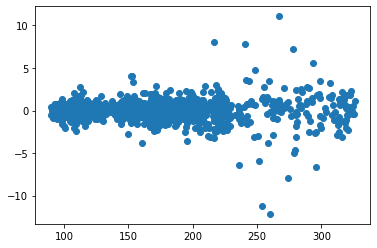

In [13]:
plt.scatter(df['pred'], df['error'])
plt.show()

In [14]:
res = model.resid

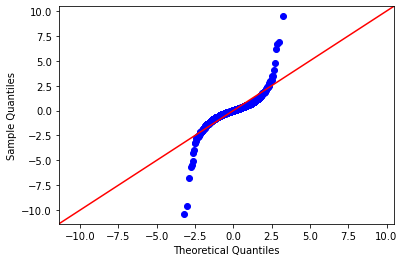

In [15]:
fig =sm.qqplot(res, fit =True , line='45')

In [16]:
df.to_excel('Predicted_final.xlsx', index = False)

In [17]:
df_ex= pd.read_excel('Predicted_final.xlsx')

In [18]:
df_ex.head()

,Date,Open,High,Low,Close,Adj Close,Volume,pred,error
0,2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400,89.635717,-0.491430
1,2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500,90.701684,0.066886
2,2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200,90.824935,-0.396361
3,2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700,89.409099,0.398045
4,2014-06-03,89.779999,91.248573,89.750000,91.077141,82.489952,73177300,90.909391,0.167750


In [19]:
df_ex.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,pred,error
1506,2020-05-20,316.679993,319.519989,316.519989,319.230011,319.230011,27876200,318.914876,0.315135
1507,2020-05-21,318.660004,320.890015,315.869995,316.850006,316.850006,25672200,318.349071,-1.499065
1508,2020-05-22,315.769989,319.230011,315.350006,318.890015,318.890015,20450800,318.263518,0.626497
1509,2020-05-26,323.500000,324.239990,316.500000,316.730011,316.730011,31380500,318.729265,-1.999254
1510,2020-05-27,316.140015,318.709991,313.089996,318.109985,318.109985,28211100,315.876010,2.233975
